In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv("/content/creditcard.csv")

In [26]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [27]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [28]:
df.shape

(284807, 31)

In [29]:
df = df.dropna()


In [30]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [31]:
df.shape

(284807, 31)

In [32]:
print(df["Class"].value_counts())

Class
0    284315
1       492
Name: count, dtype: int64


In [35]:
X = df.drop("Class", axis=1)
y = df["Class"]

In [34]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
scaler = StandardScaler()

df["Amount"] = scaler.fit_transform(df["Amount"].values.reshape(-1,1))
df["Time"]   = scaler.fit_transform(df["Time"].values.reshape(-1,1))


In [40]:
from imblearn.under_sampling import RandomUnderSampler

In [41]:
rus = RandomUnderSampler(random_state=42)
X_train_res, y_train_res = rus.fit_resample(X_train, y_train)

In [42]:
print(y_train_res.value_counts())

Class
0    394
1    394
Name: count, dtype: int64


In [43]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [44]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_res, y_train_res)

DecisionTreeClassifier(random_state=42)

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [4, 6, 8, 10, 12, None],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 5, 10, 20],
    "class_weight": [None, "balanced"]
}

grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    scoring="recall",
    cv=5,
    n_jobs=-1
)

grid.fit(X_train_res, y_train_res)

print("Best Params:", grid.best_params_)

Best Params: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [48]:
best_dt = grid.best_estimator_
best_dt.fit(X_train_res, y_train_res)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=8, random_state=42)

In [52]:
y_pred = best_dt.predict(X_test)
y_prob = best_dt.predict_proba(X_test)[:,1]

In [53]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [54]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, y_prob))


[[52119  4745]
 [   11    87]]
              precision    recall  f1-score   support

           0       1.00      0.92      0.96     56864
           1       0.02      0.89      0.04        98

    accuracy                           0.92     56962
   macro avg       0.51      0.90      0.50     56962
weighted avg       1.00      0.92      0.95     56962

AUC Score: 0.9021551959275551


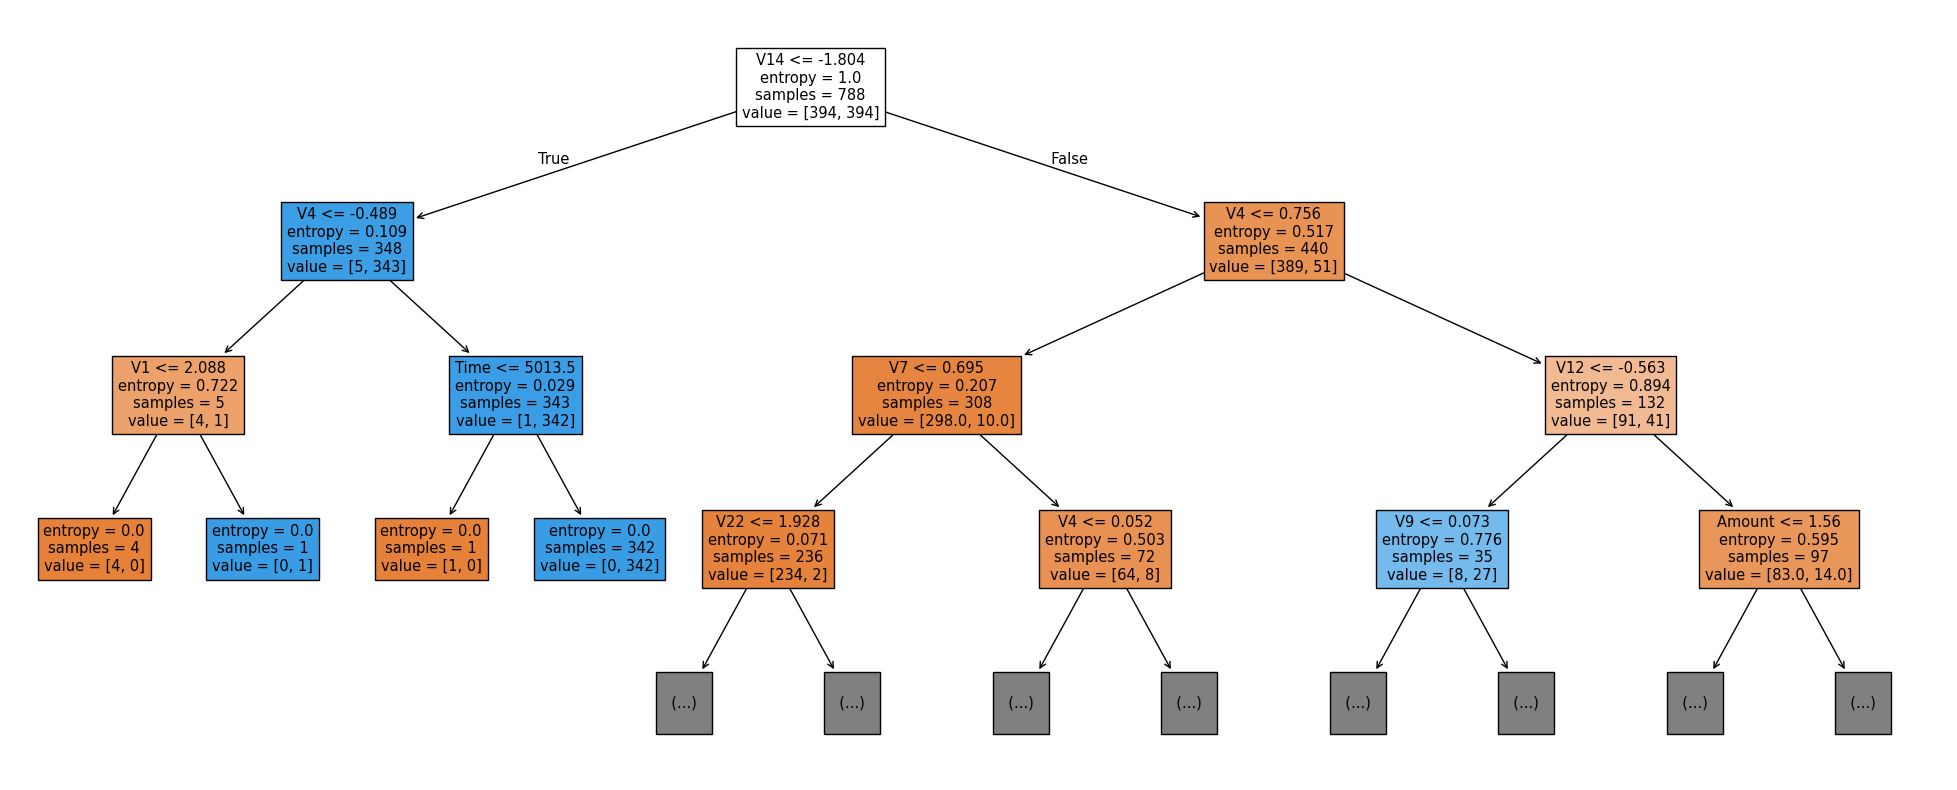

In [55]:
plt.figure(figsize=(25,10))
plot_tree(best_dt, feature_names=X.columns, max_depth=3, filled=True)
plt.show()